<a href="https://colab.research.google.com/github/Ruthuja-Gaikwad/SDN_DDoS_Ensemble_ML/blob/main/mitigation_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Min response time: 0.008 ms
Max response time: 0.037 ms
Avg response time: 0.013 ms
Standard deviation of response time: 0.005 ms


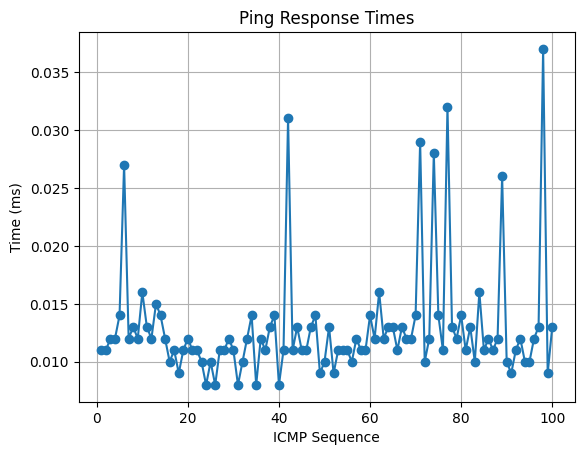

In [8]:
import pandas as pd
import re

# Define the file path
file_path = '/content/ping_results.txt'

# Initialize lists to store parsed data
times = []
seqs = []

# Read the file line by line
with open(file_path, 'r') as file:
    for line in file:
        # Use regular expression to parse the line
        match = re.search(r'time=(\d+\.?\d*)\s*ms', line)
        seq_match = re.search(r'icmp_seq=(\d+)', line)

        if match and seq_match:
            time_value = float(match.group(1))
            seq_value = int(seq_match.group(1))

            times.append(time_value)
            seqs.append(seq_value)

# Create a DataFrame from the parsed data
data = pd.DataFrame({
    'icmp_seq': seqs,
    'time_ms': times
})

# Calculate response time statistics
min_time = data['time_ms'].min()
max_time = data['time_ms'].max()
avg_time = data['time_ms'].mean()
stddev_time = data['time_ms'].std()

print(f"Min response time: {min_time:.3f} ms")
print(f"Max response time: {max_time:.3f} ms")
print(f"Avg response time: {avg_time:.3f} ms")
print(f"Standard deviation of response time: {stddev_time:.3f} ms")

# If you want to plot the results
import matplotlib.pyplot as plt

# Plot the response times
plt.plot(data['icmp_seq'], data['time_ms'], marker='o')
plt.title('Ping Response Times')
plt.xlabel('ICMP Sequence')
plt.ylabel('Time (ms)')
plt.grid(True)
plt.show()
